Integrantes:
- Victoria Alvarez
- Franco Berrios
- Felipe Manoli
- Cristobal Muñoz

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [63]:
data= pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')
## Importamos los datos.

In [64]:
datarm= data[data["Region"]== "Metropolitana"]
datarm.head()
## Filtrar por region metropolitana.

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,Tasa
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,815.0,820.0,823.0,822.0,825.0,826.0,827.0,827.0,827.0,11168.1
89,Metropolitana,13,Buin,13402.0,109641.0,7.0,8.0,14.0,20.0,20.0,...,11397.0,11453.0,11531.0,11595.0,11639.0,11685.0,11750.0,11786.0,11828.0,10787.9
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,6.0,7.0,7.0,7.0,8.0,...,2653.0,2670.0,2704.0,2734.0,2762.0,2786.0,2803.0,2813.0,2824.0,9900.1
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,4.0,4.0,5.0,11.0,...,8884.0,8950.0,8998.0,9047.0,9087.0,9119.0,9178.0,9206.0,9213.0,10356.8
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,19.0,21.0,26.0,31.0,36.0,...,19056.0,19144.0,19235.0,19316.0,19398.0,19457.0,19562.0,19606.0,19644.0,13788.6


In [65]:
datarm.drop("Tasa", axis=1, inplace= True)
## Eliminamos la columna tasa que no es necesaria en este caso.

C:\Users\Knalla\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
cantcasos= datarm.melt(id_vars=["Region","Codigo region","Comuna",
                                  "Codigo comuna","Poblacion"], var_name="fecha", value_name="casos") 
cantcasos
## Crear las columnas fecha y casos.

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,fecha,casos
0,Metropolitana,13,Alhue,13502.0,7405.0,2020-03-30,0.0
1,Metropolitana,13,Buin,13402.0,109641.0,2020-03-30,7.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,2020-03-30,6.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,2020-03-30,0.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,2020-03-30,19.0
...,...,...,...,...,...,...,...
9429,Metropolitana,13,Santiago,13101.0,503147.0,2021-12-03,49748.0
9430,Metropolitana,13,Talagante,13601.0,81838.0,2021-12-03,6094.0
9431,Metropolitana,13,Tiltil,13303.0,21477.0,2021-12-03,2117.0
9432,Metropolitana,13,Vitacura,13132.0,96774.0,2021-12-03,6069.0


In [67]:
cantcasos.drop('Codigo region', axis=1, inplace=True)
cantcasos.drop('Codigo comuna', axis=1, inplace=True)
cantcasos.drop('Poblacion', axis=1, inplace=True)
## Se eliminan las columnas que no se van a usar.

In [68]:
cantcasos['fecha'] = pd.to_datetime(cantcasos['fecha'])
## Se cambia el formato de la fecha a datetime.

In [69]:
casossem= cantcasos.groupby('Comuna').resample('W-Mon', on='fecha').sum().reset_index().sort_values(by='fecha')
casossem
## Agrupar por comuna y se ordena la fecha por semana

,Comuna,fecha,casos
0,Alhue,2020-03-30,0.0
267,Cerrillos,2020-03-30,0.0
3115,Pirque,2020-03-30,0.0
1602,La Pintana,2020-03-30,0.0
4450,Talagante,2020-03-30,0.0
...,...,...,...
2135,Lo Espejo,2021-12-06,11870.0
1423,La Cisterna,2021-12-06,11304.0
3292,Providencia,2021-12-06,11382.0
177,Buin,2021-12-06,11828.0


In [70]:
lascondes = casossem[casossem['Comuna']=="Las Condes"]
lascondes
## Se agrupan los casos en la comuna de las condes.

,Comuna,fecha,casos
1869,Las Condes,2020-03-30,181.0
1870,Las Condes,2020-04-06,690.0
1871,Las Condes,2020-04-13,843.0
1872,Las Condes,2020-04-20,952.0
1873,Las Condes,2020-04-27,701.0
...,...,...,...
1953,Las Condes,2021-11-08,42983.0
1954,Las Condes,2021-11-15,43601.0
1955,Las Condes,2021-11-22,43995.0
1956,Las Condes,2021-11-29,44282.0


In [71]:
lascondes["diferencia"] = lascondes["casos"]-lascondes["casos"].shift()
lascondes
## Se restan los casos de la semana anterior.

<ipython-input-71-2c8307fd3f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lascondes["diferencia"] = lascondes["casos"]-lascondes["casos"].shift()


,Comuna,fecha,casos,diferencia
1869,Las Condes,2020-03-30,181.0,NaN
1870,Las Condes,2020-04-06,690.0,509.0
1871,Las Condes,2020-04-13,843.0,153.0
1872,Las Condes,2020-04-20,952.0,109.0
1873,Las Condes,2020-04-27,701.0,-251.0
...,...,...,...,...
1953,Las Condes,2021-11-08,42983.0,641.0
1954,Las Condes,2021-11-15,43601.0,618.0
1955,Las Condes,2021-11-22,43995.0,394.0
1956,Las Condes,2021-11-29,44282.0,287.0


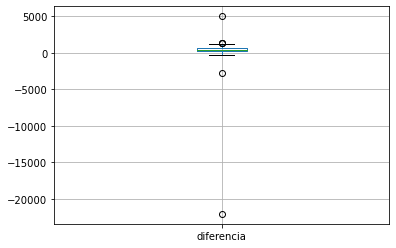

In [73]:
boxplot = lascondes.boxplot(column=['diferencia'])
## Se genera el boxplot.

In [74]:
outliers=lascondes[lascondes['diferencia']>1300]
outliers

,Comuna,fecha,casos,diferencia
1878,Las Condes,2020-06-01,4577.0,1373.0
1882,Las Condes,2020-06-29,9225.0,5033.0
1931,Las Condes,2021-06-07,32837.0,1345.0
1932,Las Condes,2021-06-14,34189.0,1352.0
